# Debate dos presidenci√°veis na Globo - 1¬∫ Turno - 2018

O debate ocorreu das 22h00 at√© por volta de 0h40 do dia 04 de Outubro de 2018 com a presen√ßa dos seguintes presidenci√°veis:
- Alvaro Dias (Podemos)
- Ciro Gomes (PDT)
- Fernando Haddad (PT)
- Geraldo Alckmin (PSDB)
- Guilherme Boulos (PSOL)
- Henrique Meirelles (MDB)
- Marina Silva (Rede)

O candidato Jair Bolsonaro (PSL) foi convidado, mas n√£o compareceu ao debate por recomenda√ß√µes m√©dicas, entretanto no mesmo hor√°rio do debate na Rede Globo o candidato deu uma entrevista na Rede Record, portanto seu nome foi considerado nesta pesquisa.
***

Importa√ß√£o das bibliotecas necess√°rias e algumas configura√ß√µes:

In [80]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import spacy

pd.set_option('display.max_rows', 200_000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 2_500)

nlp = spacy.load('pt')
nlp.max_length = 3_000_000

import warnings
warnings.filterwarnings('ignore')

### Dados inten√ß√£o de votos aos presidenci√°veis
***

Antes de come√ßar as an√°lises com os tweets, vamos dar uma olhada nos dados do Datafolha sobre os presidenci√°veis at√© ent√£o. Fonte: https://www.poder360.com.br/banco-de-dados/

In [5]:
datafolha_est = pd.read_csv('datafolha_est.csv')
datafolha_rej = pd.read_csv('datafolha_rej.csv')

datafolha_est['data_pesquisa'] = datafolha_est['data_pesquisa'].apply(lambda x: pd.Timestamp(x).date())
datafolha_rej['data_pesquisa'] = datafolha_rej['data_pesquisa'].apply(lambda x: pd.Timestamp(x).date())

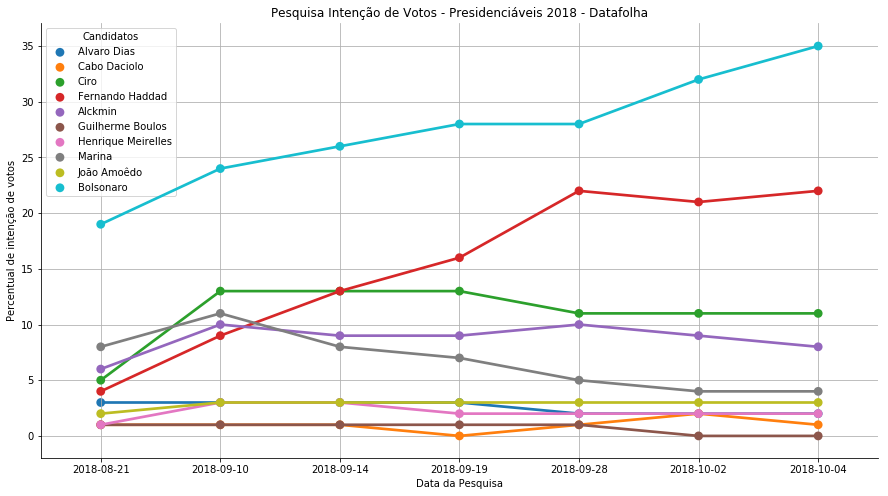

In [6]:
fig, ax = plt.subplots(figsize=(15, 8))

_ = sns.pointplot(x='data_pesquisa',
                  y='percentual',
                  hue='candidato',
                  data=datafolha_est,
                  hue_order=['Alvaro Dias', 'Cabo Daciolo', 'Ciro', 'Fernando Haddad', 'Alckmin', 'Guilherme Boulos',
                             'Henrique Meirelles', 'Marina', 'Jo√£o Amo√™do', 'Bolsonaro'],
                  ax=ax)

_ = ax.set(title='Pesquisa Inten√ß√£o de Votos - Presidenci√°veis 2018 - Datafolha',
           xlabel='Data da Pesquisa',
           ylabel='Percentual de inten√ß√£o de votos')

_ = sns.despine()
_ = ax.grid(True)
_ = ax.legend(title='Candidatos')

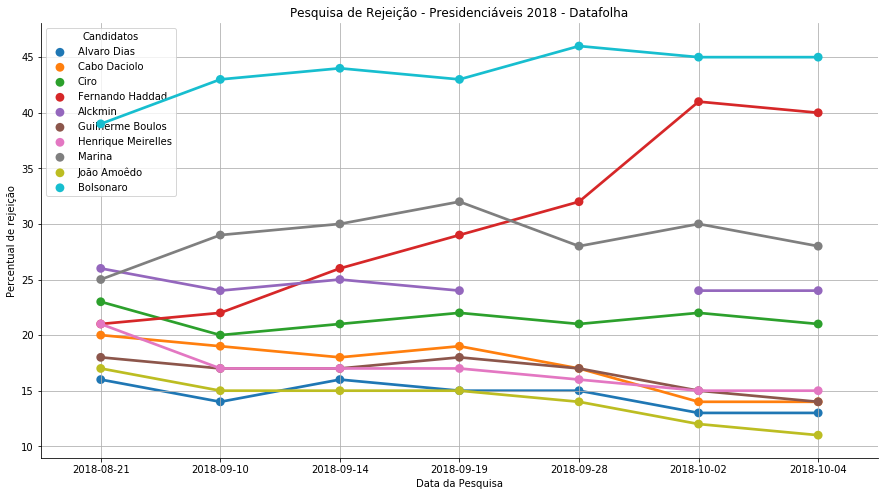

In [7]:
fig, ax = plt.subplots(figsize=(15, 8))

_ = sns.pointplot(x='data_pesquisa',
                  y='percentual',
                  hue='candidato',
                  data=datafolha_rej,
                  hue_order=['Alvaro Dias', 'Cabo Daciolo', 'Ciro', 'Fernando Haddad', 'Alckmin', 'Guilherme Boulos',
                             'Henrique Meirelles', 'Marina', 'Jo√£o Amo√™do', 'Bolsonaro'],
                  ax=ax)

_ = ax.set(title='Pesquisa de Rejei√ß√£o - Presidenci√°veis 2018 - Datafolha',
           xlabel='Data da Pesquisa',
           ylabel='Percentual de rejei√ß√£o')

_ = sns.despine()
_ = ax.grid(True)
_ = ax.legend(title='Candidatos')

## Dados twitter durante o debate
***

In [8]:
# Leitura do dataset
tweets = pd.read_csv('../tweets_debate_globo_limpo.csv')

# Convers√£o da coluna 'datetime' em objeto datetime
tweets['datetime'] = tweets['datetime'].apply(pd.Timestamp)

# Adi√ß√£o de mais duas colunas ao dataset:'hour' e 'minute'
tweets['hour'] = tweets['datetime'].apply(lambda x: x.hour)
tweets['minute'] = tweets['datetime'].apply(lambda x: x.minute)

tweets.head()

text  \
0                                                                                                                                                                                                        Boulos disse o essencial, que ninguem est√° dizendo: a democracia est√° em perigo. Isso √© s√©rio pra caralho.   
1                                                                                                                                                                                                                                                                               Debate nada, vou √© assistir Netflix   
2                                                                                                                                                                                                                                                    Boulos: A\r\nEu: CONTE COMIGO PRA TUDO (nas pr√≥ximas elei√ß√µes)   
3                                                                                                                                                                                                                                          O microfone do Meirelles caiu agora.\r\n\r\nO ponto, j√° faz uns 30 anos.   
4  PROPOSTAS DE BOLSONARO\r\n- Fim do 13¬∫ e f√©rias\r\n- Redu√ß√£o da licen√ßa maternidade\r\n- IR igual pra ricos e POBRES\r\n- Volta da CPMF\r\n- Fim do Bolsa Fam√≠lia e projetos sociais\r\n- Entrega da Petrobr√°s,BB e Caixa para americanos\r\n- Mais armas em circula√ß√£o\r\n- Teto de gastos com sa√∫de e educa√ß√£o   

                    datetime  \
0  2018-10-04 22:42:25+00:00   
1  2018-10-04 23:17:46+00:00   
2  2018-10-04 23:19:00+00:00   
3  2018-10-04 22:27:35+00:00   
4  2018-10-04 22:31:34+00:00   

                                                                                                                                                                                                                  text_clean  
0                                                                                                                                                          boulos o essencial ninguem o democracia perigar s√©rio pra caralho  
1                                                                                                                                                                                              debater nado assistir netflix  
2                                                                                                                                                                                       boulos o contar comigo pra o elei√ß√£o  
3                                                                                                                                                                                     o microfone meirelles cair o pontar 30  
4  proposto bolsonaro 13¬∫ e f√©ria redu√ß√£o licen√ßa maternidade igual pra rico e pobre voltar cpmf bolsar fam√≠lia e projetos social entregar petrobr√°s b e caixa parir americano armar circula√ß√£o teto gasto saudar e educa√ß√£o

In [12]:
# Dimens√£o do dataset
tweets.shape

(508503, 5)

In [13]:
# Cria√ß√£o de vari√°veis que ser√£o utilizadas no decorrer das an√°lises
candidatos = ['alvaro', 'ciro', 'haddad', 'alckmin', 'boulos', 'meirelles', 'marina', 'bolsonaro']
display_candidatos = ['√Ålvaro Dias', 'Ciro Gomes', 'Fernando Haddad', 'Geraldo Alckmin', 'Guilherme Boulos', 'Henrique Meirelles', 'Marina Silva', 'Jair Bolsonaro']
colors = ['blue', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'c']
map_names = {k: v for k, v in zip(candidatos, display_candidatos)}

In [92]:
# Fun√ß√µes que ser√£o utilizads nas an√°lises
import re
from collections import Counter

def mask_palavra_texto(palavra, texto):
    padr√£o = r'(^|[^\w]){}([^\w]|$)'.format(palavra)
    padr√£o = re.compile(padr√£o, re.IGNORECASE)
    matches = re.search(padr√£o, texto)
    return bool(matches)

def plot_contagem_candidatos(df, lista_candidatos):
    contagem = []
    palette = {k: v for k, v in zip(display_candidatos, colors)}    
    for candidato in lista_candidatos:
        contagem.append(df['text'].astype(str).apply(lambda x: mask_palavra_texto(candidato, x.lower())).sum())

    plot_df = pd.DataFrame({'Candidatos': candidatos, 'Contagem': contagem}).sort_values(by='Contagem', ascending=False)
    plot_df['Candidatos'] = plot_df['Candidatos'].map(map_names)
    fig, ax = plt.subplots(figsize=(15, 8))
    _ = sns.barplot(x='Candidatos', y='Contagem', data=plot_df, ax=ax, palette=palette)
    _ = ax.set(title='Contagem de tweets em que cada candidato foi citado')
    _ = sns.despine()

def verbos_candidatos(texto, candidato, qtde=5):
    sents = [sent for sent in texto.sents if candidato in sent.string.lower()]
    char_words = []
    for sent in sents: 
        for word in sent: 
            if candidato in word.string: 
                char_words.append(word)
    char_verbs = []
    for word in char_words: 
        for ancestor in word.ancestors: 
            if ancestor.pos_.startswith('V'): 
                char_verbs.append(ancestor.lemma_.strip())
    return Counter(char_verbs).most_common(qtde)

def adjetivos_candidatos(texto, candidato, qtde=5):
    sents = [sent for sent in texto.sents if candidato in sent.string.lower()]
    char_adjs = []
    for sent in sents: 
        for word in sent: 
            for child in word.children: 
                if child.pos_ == 'ADJ':
                    char_adjs.append(child)
    return Counter(char_adjs).most_common(qtde)
                    
def frases_candidato(df, candidato, palavra, qtde=5):
    mask_cand = df['text_clean'].astype(str).apply(lambda x: mask_palavra_texto(candidato, x))
    mask_palavra = df['text_clean'].astype(str).apply(lambda x: mask_palavra_texto(palavra, x))
    return list(df[mask_cand & mask_palavra]['text'].head(qtde))

In [ ]:
plot_contagem_candidatos(tweets, candidatos)

Distribui√ß√£o dos tweets por candidato durante o debate:

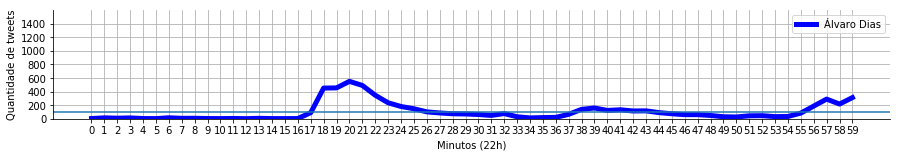

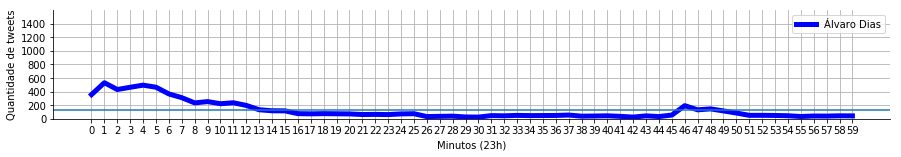

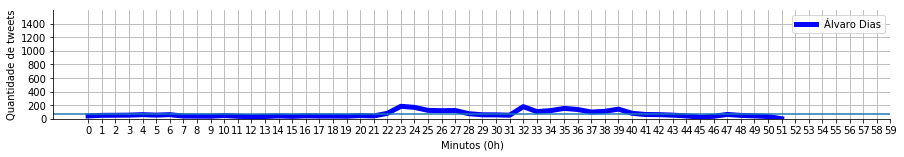

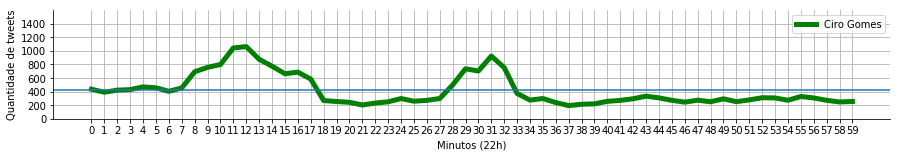

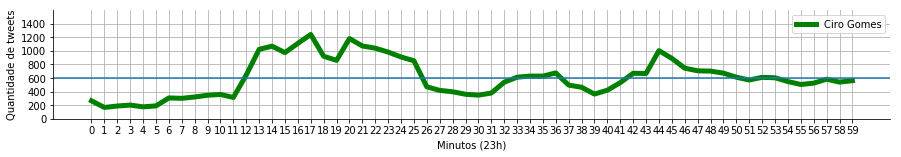

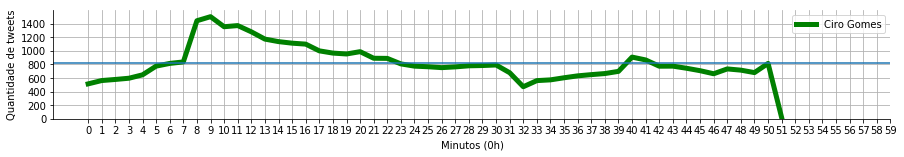

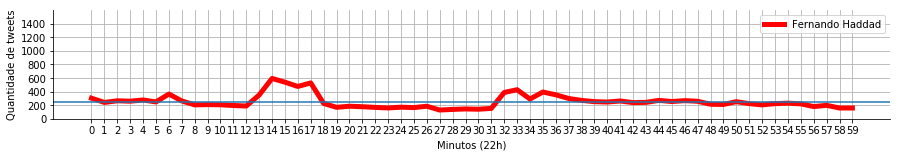

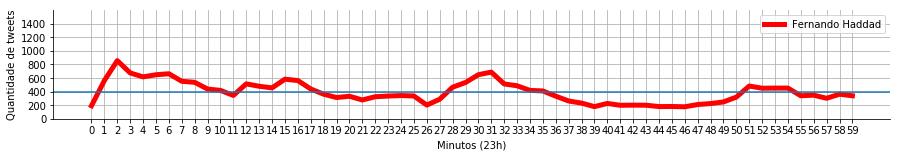

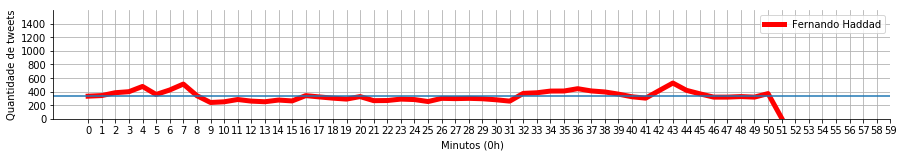

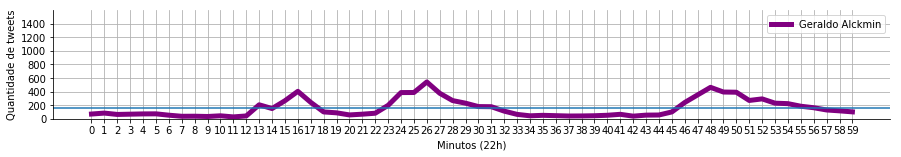

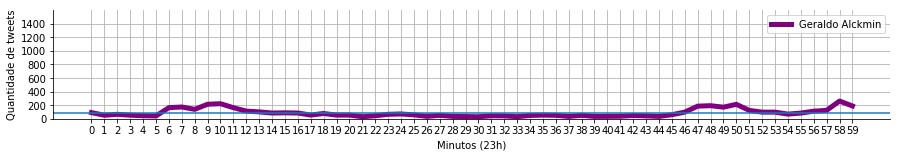

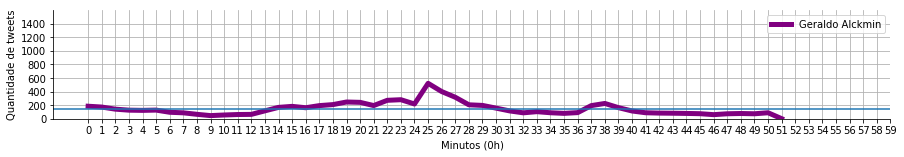

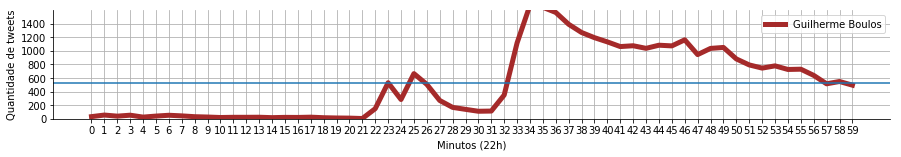

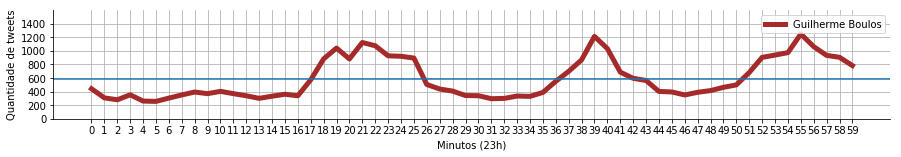

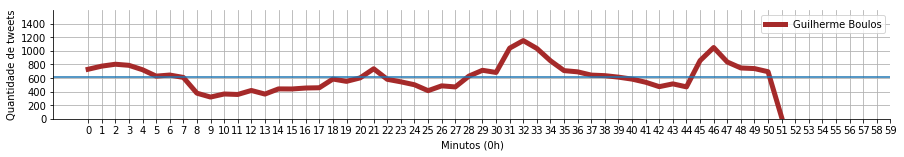

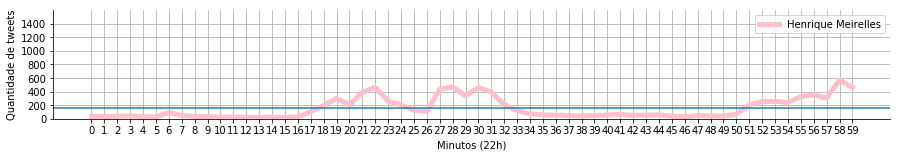

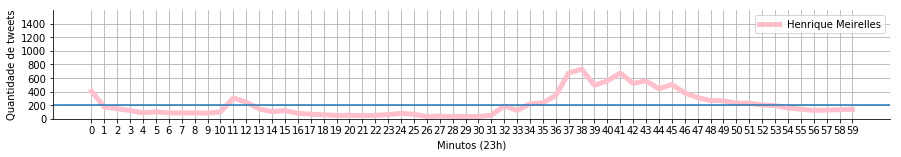

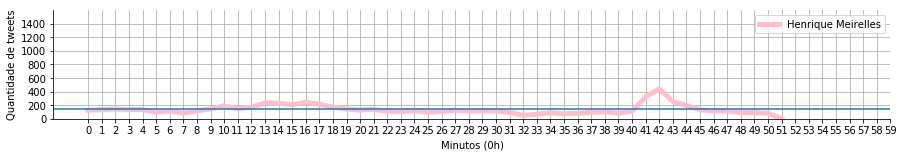

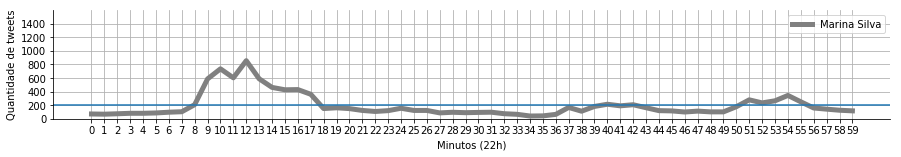

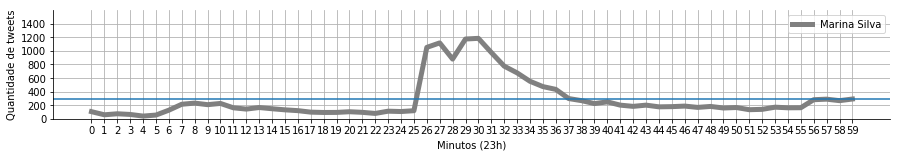

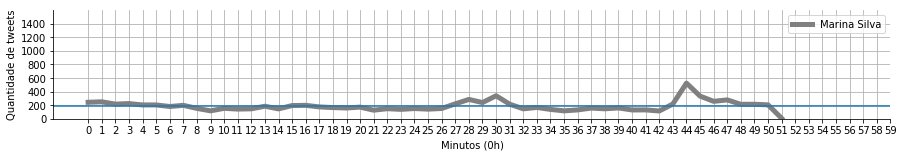

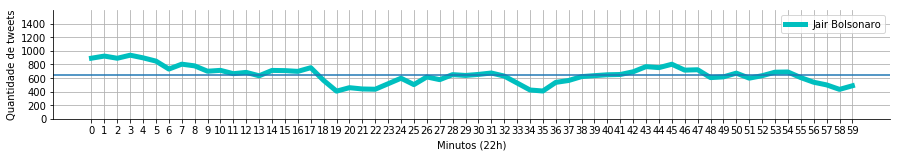

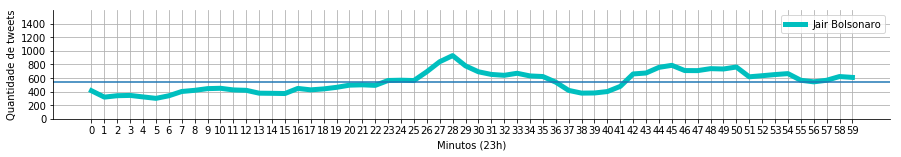

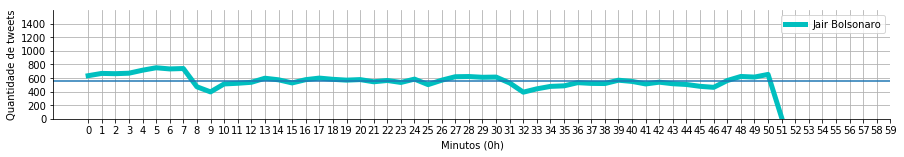

In [89]:
for candidato, c, nome in zip(candidatos, colors, display_candidatos):
    df_cand = tweets[tweets['text'].apply(lambda x: mask_palavra_texto(candidato, x))]
    for hora in [22, 23, 0]:
        fig, ax = plt.subplots(figsize=(15, 2))
        to_plot = df_cand[df_cand['hour']==hora]['minute'].value_counts().sort_index().reset_index()
        _ = sns.lineplot(x='index', y='minute', data=to_plot, ax=ax, color=c, label=nome, linewidth=5)

        _ = ax.set(xlabel='Minutos ({0}h)'.format(hora),
                   ylabel='Quantidade de tweets',
                   xticks=list(range(0, 60, 1)),
                   yticks=list(range(0, 1_500, 200)),
                   ylim=[0, 1_600])

        _ = ax.legend()
        _ = ax.grid(True)
        _ = ax.axhline(to_plot['minute'].mean())

        _ = sns.despine()
    _ = plt.subplots_adjust(hspace=0.4)

## An√°lise NLP
***

Por quest√£o de limita√ß√µes no processamento a an√°lise dos tweets atrav√©s de NLP ser√° feita apenas nos tweets compreendidos nos espa√ßos de tempo onde houve uma manifesta√ß√£o maior no twitter durante o debate em rela√ß√£o a cada candidato. √â poss√≠vel visualizar estas manifesta√ß√µes nos gr√°ficos anteriores.<br>
Para n√£o estender o notebook, ser√° analisado apenas dois picos de manifesta√ß√µes no twitter por candidato.

In [49]:
def analise_nlp(df_tweets, candidato, hora, minutos_comeco, minutos_fim):
    df_cand = df_tweets[df_tweets['text'].apply(lambda x: mask_palavra_texto(candidato, x))]
    df = df_cand[(df_cand['hour']==hora) & ((df_cand['minute']>=minutos_comeco) & (df_cand['minute']<=minutos_fim))].copy()
    df_spacy = nlp(str(df['text']))
    nome = display_candidatos[candidatos.index(candidato)]
    verbos = verbos_candidatos(df_spacy, candidato)
    adjetivos = adjetivos_candidatos(df_spacy, candidato)
    print(' Hor√°rio:  {0}h{1} as {0}h{2}'.format(hora, minutos_comeco, minutos_fim))
    print(' Presidenci√°vel:  {0}'.format(nome))
    print(' Quantidade de tweets:  {0}'.format(df.shape[0]))
    print(' Verbos mais utilizados:  {0}'.format(verbos))
    print(' Adjetivos mais utilizados:  {0}'.format(adjetivos))
    print('\n')
    if candidato == 'marina':
        candidato = 'marino'
    for verbo in verbos:
        tweets = frases_candidato(df, candidato, verbo[0])
        flag = 0
        if (len(tweets) != 0) & (flag<3):
            print(' Alguns tweets com o verbo "{0}":'.format(verbo[0]))
            for tweet in tweets:
                print('')
                print(u'\U0001f4ac   {0}'.format(tweet))
            print('\n')
            flag+=1

**√Ålvaro Dias**

In [20]:
analise_nlp(tweets, 'alvaro', 22, 17, 23)

 Hor√°rio:  22h17 as 22h23
 Presidenci√°vel:  √Ålvaro Dias
 Quantidade de tweets:  2622
 Verbos mais utilizados:  [('ficar', 85), ('querer', 74), ('beber', 33), ('ter', 32), ('fazer', 28)]
 Adjetivos mais utilizados:  [(capital, 1), (feliz, 1), (belo, 1), (b√™bado, 1), (igual, 1)]


 Alguns tweets com o verbo "ficar":

üí¨   Beber at√© ficar doido que nem o Alvaro Dias

üí¨   Quero beber no fds ate ficar igual o Alvaro dias

üí¨   O ALVARO DIAS ficou elogiando o William Bonner e esqueceu de perguntar e o tempo acabou KKKKKKKKKKKKKKKKKKKKKKKK

pqp mano olha o nivel dos candidatos

#DebateGlobo https://t.co/Mipb5ava0Q

üí¨   Quero beber no fds ate ficar igual o Alvaro dias

üí¨   alvaro dias passou 2hrs babando o ovo do william bonner que ficou sem tempo pra fazer pergunta, grito


 Alguns tweets com o verbo "querer":

üí¨   Quero beber no fds ate ficar igual o Alvaro dias

üí¨   Quero beber no fds ate ficar igual o Alvaro dias

üí¨   Quero beber no fds ate ficar igual o Alvaro d

In [21]:
analise_nlp(tweets, 'alvaro', 23, 0, 7)

 Hor√°rio:  23h0 as 23h7
 Presidenci√°vel:  √Ålvaro Dias
 Quantidade de tweets:  3419
 Verbos mais utilizados:  [('tomar', 108), ('dar', 75), ('ter', 74), ('parecer', 67), ('dia', 61)]
 Adjetivos mais utilizados:  [(devido, 1), (podre, 1), (u√≠sque, 1), (alvaro, 1), (maior, 1)]


 Alguns tweets com o verbo "tomar":

üí¨   cala a boca alvaro dias vai tomar no cu

üí¨   O ALVARO DIAS T√Å MAIS LOCO QUE O ROBOCOP TOMANDO BANHO DE MANGUEIRA

üí¨   A FELICIDADE DO ALVARO DIAS TOMANDO ESPORRO DO BONNER

üí¨   alvaro dias tomando varios esporros LKKKKKKKKKK #DebateNaGlobo

üí¨   alguem descobre oq foi q alvaro dias tomou antes do debate pq eu quero um pouco 

#DebateNaGlobo


 Alguns tweets com o verbo "parecer":

üí¨   o alvaro dias parece tio bebado em final de festa

üí¨   ai FINALMENTE um pux√£o de orelha no alvaro dias, parece que t√° ali de brincadeira, eu hein

üí¨   alvaro dias t√° parecendo tio bebado final de festa de fam√≠lia

üí¨   Alvaro Dias x Haddad ta parecendo cl√°ssi

- Ciro Gomes

In [22]:
analise_nlp(tweets, 'ciro', 22, 8, 15)

 Hor√°rio:  22h8 as 22h15
 Presidenci√°vel:  Ciro Gomes
 Quantidade de tweets:  6666
 Verbos mais utilizados:  [('votar', 84), ('querer', 65), ('ter', 62), ('come√ßar', 48), ('amar', 47)]
 Adjetivos mais utilizados:  [(gomes, 1), (sensatas, 1), (primeira, 1), (marina, 1), (real, 1)]


 Alguns tweets com o verbo "votar":

üí¨   A primeira pergunta do Ciro j√° me fez sentir orgulho de votar nele

#DebateGlobo https://t.co/j9innHcixY

üí¨   Ciro: Marina √© muito sensata pensa parecido comigo por√©m sou melhor votem em mim. 

#DebateNaGlobo

üí¨   N√£o vote contra o PT ‚ùó

N√£o vote contra Bolsonaro üö´

Vote a favor do Brasil üáßüá∑

Vote Ciro 1Ô∏è‚É£2Ô∏è‚É£
 #TsunamiCIRO https://t.co/nC0m7SuQeZ

üí¨   A primeira pergunta do Ciro j√° me fez sentir orgulho de votar nele

#DebateGlobo https://t.co/j9innHcixY

üí¨   Bolsonaristas j√° comemoram prov√°vel vit√≥ria sobre Haddad!

Novamente, DataFolha mostra que Bolsonaro s√≥ perde para Ciro.

Bolsonaro 44% x 43% Haddad 
Ciro 48% x 42% 

In [31]:
analise_nlp(tweets, 'ciro', 0, 7, 10)

 Hor√°rio:  0h7 as 0h10
 Presidenci√°vel:  Ciro Gomes
 Quantidade de tweets:  5138
 Verbos mais utilizados:  [('olhar', 53), ('votar', 44), ('ter', 42), ('fazer', 33), ('DebateNaGlobo', 30)]
 Adjetivos mais utilizados:  [(severo, 1), (feminino, 1), (1005, 1), (maior, 1), (‚Äù, 1)]


 Alguns tweets com o verbo "olhar":

üí¨   Olha o Ciro tentando cativar o p√∫blico feminino.

üí¨   Pesquisa datafolha:
Bolsonaro: 35%
Haddad: 22%
Ciro: 11%

Eu vou falar uma parada bem seria.   Ciro n√£o cresce a 5 pesquisas. Est√° a tr√™s pesquisas com 11%.
 
Se a esquerda n√£o abrir o olho n√£o vai ter segundo turno para brigar.
Voto √∫til √©  no Haddad sim.

üí¨   eu jamais conseguiria ser pol√≠tica olha esse tanto de gente em volta do Ciro eu j√° tinha infartado

üí¨   olha o ciro chavecando o bonner kkkkk

üí¨   Olha a√≠ um segundo turno dos sonhos; Ciro X Haddad, discutindo propostas!


 Alguns tweets com o verbo "votar":

üí¨   JESUS teve 12 ap√≥stolos, nao 17
isso eh um sinal
votem ciro 12



- Fernando Haddad

In [32]:
analise_nlp(tweets, 'haddad', 22, 13, 17)

 Hor√°rio:  22h13 as 22h17
 Presidenci√°vel:  Fernando Haddad
 Quantidade de tweets:  2487
 Verbos mais utilizados:  [('ter', 26), ('falar', 25), ('dar', 17), ('falir', 16), ('votar', 15)]
 Adjetivos mais utilizados:  [(haddad, 1), (vivo, 1), (segundo, 1), (√∫ltimo, 1), (1¬∫, 1)]


 Alguns tweets com o verbo "falar":

üí¨   meu deus o PT foi o governo + corporativista da hist√≥ria e o haddad acha que tem o direito de falar algo

üí¨   Haddad falando do governo do FHC 33203838299382 milh√µes de anos atr√°s. Eu quero saber do futuro, quero saber da pro‚Ä¶ https://t.co/tUzQ3CM0sJ

üí¨   Haddad falou muito bem. PSDB entre outros partidos ajudaram a acabar com o governo de Dilma e a economia brasileira.

üí¨   S√≥ eu acho que o Haddad tem pregui√ßa de falar?

üí¨   N√£o sei se o Haddad tava falando e olhando pro Alckmin ou pra c√¢mera #DebateNaGlobo


 Alguns tweets com o verbo "falir":

üí¨   Falam em pol√≠tica do medo e criticam com voto no medo, mas dizem que Haddad e Bolsonaro n√£

In [33]:
analise_nlp(tweets, 'haddad', 23, 1, 8)

 Hor√°rio:  23h1 as 23h8
 Presidenci√°vel:  Fernando Haddad
 Quantidade de tweets:  5111
 Verbos mais utilizados:  [('querer', 61), ('dizer', 41), ('botar', 36), ('ficar', 33), ('dar', 31)]
 Adjetivos mais utilizados:  [(dantesco, 1), (devido, 1), (nervoso, 1), (nervoso, 1), (favorita?\r\n-, 1)]


 Alguns tweets com o verbo "querer":

üí¨   e o alvaro dias querendo fazer o haddad de correio elegante

üí¨   Haddad dando a bronca que a gente queria no √Ålvaro Dias. Obrigado √≠cone!

üí¨   eu queria ter dois t√≠tulos pra votar no boulos e no haddad

üí¨   @andreazzaeditor O que Haddad quer dizer quando fala ‚Äúvoc√™s destru√≠ram‚Äù falando da economia?

üí¨   "eu quero ficar bem de frente pro haddad" KKKKKKKKKKKKKKK mas gente  #DebateNaGlobo


 Alguns tweets com o verbo "botar":

üí¨   haddad botou o pau na mesa

üí¨   √ÅLVARO DIAS BOTANDO MORAL. HADDAD, RESPONDA S√ì UMA DAS PERGUNTAS, DEIXE DE ENROLAR.

üí¨   Haddad usou a experi√™ncia do professor botando o aluno bagunceiro e de

- Geraldo Alckmin

In [34]:
analise_nlp(tweets, 'alckmin', 22, 23, 28)

 Hor√°rio:  22h23 as 22h28
 Presidenci√°vel:  Geraldo Alckmin
 Quantidade de tweets:  2157
 Verbos mais utilizados:  [('ter', 37), ('falar', 21), ('parecer', 19), ('falir', 14), ('querer', 13)]
 Adjetivos mais utilizados:  [(geraldo, 1), (igual, 1), (https://t.co/8I1LcDYYUd, 1), (necess√°ria, 1), (trabalhista, 1)]


 Alguns tweets com o verbo "falar":

üí¨   Alckmin falando que a reforma trabalhista foi "necess√°ria" e n√£o retira direitos dos trabalhadores.

meus parab√©ns‚Ä¶ https://t.co/qrTz71xlco

üí¨   a gente ouve alckmin falando e fica EM SITUA√á√ÉO DE AGREDIR UM IDOSO

üí¨   O Alckmin falando da TV do Lula
O Boulos falando de 50 tons de temer
O Ciro falando do Cear√°
O Meirelles pedindo pr‚Ä¶ https://t.co/CqX6szshj1

üí¨   "Alckmin, n√≥s estamos de fato em lados opostos. Voc√™ √© da turma dos privil√©gios e eu dos direitos. Falar que a reforma n√£o tirou direitos √© brincar com o povo. Quem est√° procurando emprego sabe a dificuldade que √© encontrar um com carteira assinad

In [35]:
analise_nlp(tweets, 'alckmin', 0, 24, 27)

 Hor√°rio:  0h24 as 0h27
 Presidenci√°vel:  Geraldo Alckmin
 Quantidade de tweets:  1458
 Verbos mais utilizados:  [('falar', 30), ('ter', 23), ('entender', 16), ('achar', 11), ('dizer', 10)]
 Adjetivos mais utilizados:  [(comum, 1), (primeira, 1), (\r\n\r\nA, 1), (pequeninos, 1), (#, 1)]


 Alguns tweets com o verbo "falar":

üí¨   Que bonito isso que  o Alckmin falou do filho que a m√£e ama mais poetisou

üí¨   ALCKMIN E √ÅLVARO DIAS FALANDO DE EDUCA√á√ÉO????

VIROU STAND UP AGORA????????

üí¨   @mizanzuk Juro que quando o Alckmin falou, "olha, √Ålvaro, n√≥s temos em comum..." eu pensei "a surra que demos nos professores".

üí¨   Alckmin, ladr√£o de merenda, falando que quer ser o presidente dos pequeninos 

A desfa√ßatez desses ARROMBADOS desconhece limites

üí¨   Botaram o Alckmin e √Ålvaro Dias falando sobre educa√ß√£o e os professores j√° sentitam uma pancada. #DebateNaGlobo #elei√ß√µes2018


 Alguns tweets com o verbo "entender":

üí¨   passo a maior parte do tempo das res

- Guilherme Boulos

In [37]:
analise_nlp(tweets, 'boulos', 22, 33, 37)

 Hor√°rio:  22h33 as 22h37
 Presidenci√°vel:  Guilherme Boulos
 Quantidade de tweets:  7386
 Verbos mais utilizados:  [('falar', 87), ('querer', 79), ('votar', 63), ('fazer', 60), ('falir', 57)]
 Adjetivos mais utilizados:  [(arrepiante, 1), (sensato, 1), (super, 1), (dram√°tico, 1), (boulos, 1)]


 Alguns tweets com o verbo "falar":

üí¨   Boulos falando o que precisa ser falado. D√° at√© vontade de chorar. #DebateNaGlobo

üí¨   BOULOS FALANDO S√ì VERDADES #DebateNaGlobo

üí¨   pq o boulos fecha o olho p falar #DebateNaGlobo

üí¨   Arrepiei com o Boulos falando. Se um dia critiquei ele, n√£o me lembro

üí¨   O BOULOS FALANDO PARECE Q TO ASSISTINDO UMA MINISS√âRIE DA GLOBO


 Alguns tweets com o verbo "querer":

üí¨   boulos vc quer o mundo? eu te dou

üí¨   Fico indignado com esse ‚Äúshowzinho‚Äù do Boulos MST, fala que n√£o quer viver na ditadura e apoia a porra do Maduro! #DebateNaGlobo

üí¨   Boulos dizendo que n√£o quer suas filhas vivendo numa ‚Äúditadura‚Äù mas n√£o cans

In [38]:
analise_nlp(tweets, 'boulos', 23, 18, 25)

 Hor√°rio:  23h18 as 23h25
 Presidenci√°vel:  Guilherme Boulos
 Quantidade de tweets:  7743
 Verbos mais utilizados:  [('querer', 145), ('falir', 114), ('ter', 93), ('esperar', 86), ('falar', 61)]
 Adjetivos mais utilizados:  [(pr√≥ximas, 1), (#, 1), (claro, 1), (ruim, 1), (vamo, 1)]


 Alguns tweets com o verbo "querer":

üí¨   meu pai queria votar em branco mas come√ßou a elogiar o boulos e ciro üëÄ

üí¨   Ciro trabalhou com Marina, que foi do partido do Haddad (apoiado por Boulos) que elegeu Temer, que chamou o Meirelles e o partido do Alckmin, que teve apoio do √Ålvaro (congressista h√° anos como Bolsonaro). Quer renovar? S√≥ tem um: @joaoamoedonovo

üí¨   N√£o querem chamar o Ciro e nem o Boulos pq sabem que os 2 comem o cu sem lubrificante mesmo

#DebateNaGlobo https://t.co/WjzSCUBMmp

üí¨   ‚ÄúN√≥s n√£o queremos construir pres√≠dios, queremos construir escolas‚Äù BOULOS, Guilherme. O futuro da pol√≠tica brasileira.

üí¨   Resumo do debate:

Haddad: acordou e foi pra briga


- Henrique Meirelles

In [44]:
analise_nlp(tweets, 'meirelles', 22, 27, 31)

 Hor√°rio:  22h27 as 22h31
 Presidenci√°vel:  Henrique Meirelles
 Quantidade de tweets:  2094
 Verbos mais utilizados:  [('tava', 55), ('ter', 35), ('conseguir', 35), ('parecer', 33), ('cair', 32)]
 Adjetivos mais utilizados:  [(agora.\r\n\r\nO, 1), (1503, 1), (segundo, 1), (c√¥mico, 1), (igual, 1)]


 Alguns tweets com o verbo "tava":

üí¨   o meirelles certeza q tava em um dos barco q veio de portugual colonizar o brasil

üí¨   o meirelles certeza q tava em um dos barco q veio de portugual colonizar o brasil

üí¨   o meirelles certeza q tava em um dos barco q veio de portugual colonizar o brasil

üí¨   o meirelles certeza q tava em um dos barco q veio de portugual colonizar o brasil

üí¨   o meirelles certeza q tava em um dos barco q veio de portugual colonizar o brasil


 Alguns tweets com o verbo "conseguir":

üí¨   O ALVARO DIAS NAO CONSEGUIU PERGUNTAR E O MEIRELLES TEM QUE RESPONDER UMA PERGUNTA QUE NAO ACONTECEU

üí¨   henrique meirelles n√£o est√° conseguindo nem mais se

In [45]:
analise_nlp(tweets, 'meirelles', 22, 55, 59)

 Hor√°rio:  22h55 as 22h59
 Presidenci√°vel:  Henrique Meirelles
 Quantidade de tweets:  2022
 Verbos mais utilizados:  [('ter', 53), ('parecer', 37), ('falir', 28), ('dar', 22), ('chamar', 20)]
 Adjetivos mais utilizados:  [(longas, 1), (#, 1), (legal, 1), (engra√ßado, 1), (calculista, 1)]


 Alguns tweets com o verbo "parecer":

üí¨   o meirelles e o alvaro parece que acabaram de sair da endoscopia

üí¨   essa dobradinha henrique meirelles alvaro dias ta parecendo aqueles aluno da escolinha do professor raimunfo que nao consegue segurar o riso

üí¨   gente alguem tira o meirelles meu deus parece uma lesma falando coitado

üí¨   Meirelles X √Ålvaro Dias faz Americano X ibis parecer aceit√°vel

üí¨   essa dobradinha henrique meirelles alvaro dias ta parecendo aqueles aluno da escolinha do professor raimunfo que nao consegue segurar o riso


 Alguns tweets com o verbo "falir":

üí¨   Meirelles fala devagar pra enrolar ou porque n√£o tem f√¥lego?

üí¨   alvaro dias e meirelles os 

- Marina Silva

In [47]:
analise_nlp(tweets, 'marina', 22, 9, 17)

 Hor√°rio:  22h9 as 22h17
 Presidenci√°vel:  Marina Silva
 Quantidade de tweets:  5049
 Verbos mais utilizados:  [('querer', 113), ('insistir', 73), ('achar', 45), ('ter', 43), ('falar', 39)]
 Adjetivos mais utilizados:  [(seringueira, 1), (senadora, 1), (ministra\r\nMais, 1), (jovem, 1), (sensatas, 1)]


 Alguns tweets com o verbo "querer":

üí¨   Queria Marina como vice do Ciro ao inv√©s da Miss motosserra üò©

üí¨   ciro presidente marina vice, esse √© o brasil que eu quero pro futuro

üí¨   Queria que algu√©m insistisse em mim como a Marina insiste em ser presidente

üí¨   queria o ciro e a marina no segundo turno, brasileiros pq me mataram? #DebateNaGlobo https://t.co/ML2l0u2bfT

üí¨   Eu quero ver √© lava√ß√£o de roupa suja e n√£o pergunta pra Marina pff


 Alguns tweets com o verbo "insistir":

üí¨   Queria que algu√©m insistisse em mim como a Marina insiste em ser presidente

üí¨   queria algu√©m   insistindo   em mim 
igual a marina silva insiste   em ser presidente



In [50]:
analise_nlp(tweets, 'marina', 23, 26, 34)

 Hor√°rio:  23h26 as 23h34
 Presidenci√°vel:  Marina Silva
 Quantidade de tweets:  8384
 Verbos mais utilizados:  [('falar', 155), ('amarelar', 96), ('ter', 85), ('dar', 55), ('querer', 54)]
 Adjetivos mais utilizados:  [(DEMAIS, 1), (da, 1), (melhor, 1), (miss, 1), (sustentabilidade, 1)]


 Alguns tweets com o verbo "falar":

üí¨   Marina Silva falando que o Bolsonaro amarelou KKKKKKK

üí¨   Marina falou bonito agora #DebateNaGlobo

üí¨   MARINA FALANDO QUE BOLSONARO AMARELOU. QUE DEU UMA ENTREVISTA PARA A RECORD E N√ÉO APARECEU NO DEBATE  #DebateNaGlobo https://t.co/sU7bcFPRIU

üí¨   Marina falou que Bolsonaro Amarelou, deu entrevista para Record e n√£o para o #DebateNaGlobo. √çCONE! https://t.co/ecSmm1oOwR

üí¨   marina falando ‚Äúrecord‚Äù ao inv√©s de ‚Äúem outra emissora‚Äù na globo 

#DebateNaGlobo https://t.co/K9E27meGxk


 Alguns tweets com o verbo "amarelar":

üí¨   Marina Silva falando que o Bolsonaro amarelou KKKKKKK

üí¨   marina silva "o candidato bolsonaro amarelo

- Jair Bolsonaro

In [51]:
analise_nlp(tweets, 'bolsonaro', 22, 0, 8)

 Hor√°rio:  22h0 as 22h8
 Presidenci√°vel:  Jair Bolsonaro
 Quantidade de tweets:  7703
 Verbos mais utilizados:  [('votar', 112), ('ter', 45), ('dizer', 33), ('destruir', 31), ('querer', 29)]
 Adjetivos mais utilizados:  [(maior, 1), (primeiro, 1), (negro, 1), (bolsonaro, 1), (primeiro, 1)]


 Alguns tweets com o verbo "votar":

üí¨   Meus dois principais argumentos pr√≥-Ciro s√£o 

- N√£o √© do PT
- N√£o √© o Bolsonaro

Meu voto √© #TsunamiCIRO. Entretanto, se for o Haddad pro segundo turno: https://t.co/Cdw0JFQNCi

üí¨   Candidato do Bolsonaro √© o Ol√≠mpio. O voto tem que ser nele. J√° disse, mas vou repetir: A aprova√ß√£o de um Ministro do STF passa pelo Senado. Bolsonaro precisar√° ter maioria. Incr√≠vel como muitos n√£o entendem isso! https://t.co/BB7rVK43Xr

üí¨   "Ciranda, cirandinha,
Vamos todos cirandar.
Nem PT, nem Bolsonaro
Vote 12 pra mudar"

#TsunamiCIRO https://t.co/YxS3TDPHba

üí¨   Metade dos evang√©licos vota em Bolsonaro. https://t.co/Bqs2QKRqOw

üí¨   eu me in

In [52]:
analise_nlp(tweets, 'bolsonaro', 23, 26, 30)

 Hor√°rio:  23h26 as 23h30
 Presidenci√°vel:  Jair Bolsonaro
 Quantidade de tweets:  3934
 Verbos mais utilizados:  [('amarelar', 128), ('fazer', 97), ('falar', 48), ('querer', 32), ('dizer', 31)]
 Adjetivos mais utilizados:  [(pesquisas, 1), (bolsonaro, 1), (https://t.co/KutxOFYWeS, 1), (bolsonaro, 1), (trabalhador, 1)]


 Alguns tweets com o verbo "amarelar":

üí¨   Marina Silva falando que o Bolsonaro amarelou KKKKKKK

üí¨   "eu faria essa pergunta pro candidato bolsonaro que amarelou e n√£o est√° no debate, mas t√° dando entrevista pra record" #DebateNaGlobo https://t.co/709SwZPuCq

üí¨   #MARINASILVA, #BOLSONARO N√ÉO AMARELOU. Ele levou uma facada de Ad√©lio Silva. Deveria ficar calada, parar de dizer a‚Ä¶ https://t.co/Lk0j2Mba48

üí¨   #DebateNaGlobo Marina repete que Bolsonaro amarelou e √© aplaudida https://t.co/KutxOFYWeS

üí¨   Bolsonaro AMARELOU


 Alguns tweets com o verbo "falar":

üí¨   Ciro Gomes √© um canalha, participou de 2 debates com o Bolsonaro, porque n√£o f

## An√°lise de Sentimentos

In [53]:
# Datasets train e holdout anteriormente tratados (notebook Preprocessing)
train = pd.read_csv('../tweets_train.csv')
holdout = pd.read_csv('../tweets_holdout.csv')

In [54]:
train.head()

text  \
0                                                                                                                                                                                                                        Boulos disse o essencial, que ninguem est√° dizendo: a democracia est√° em perigo. Isso √© s√©rio pra caralho.   
1                                                                                                                                                                                                                                                                                               Debate nada, vou √© assistir Netflix   
2                                                                                                                                                                                                                                                                  Boulos: A\r\r\nEu: CONTE COMIGO PRA TUDO (nas pr√≥ximas elei√ß√µes)   
3                                                                                                                                                                                                                                                      O microfone do Meirelles caiu agora.\r\r\n\r\r\nO ponto, j√° faz uns 30 anos.   
4  PROPOSTAS DE BOLSONARO\r\r\n- Fim do 13¬∫ e f√©rias\r\r\n- Redu√ß√£o da licen√ßa maternidade\r\r\n- IR igual pra ricos e POBRES\r\r\n- Volta da CPMF\r\r\n- Fim do Bolsa Fam√≠lia e projetos sociais\r\r\n- Entrega da Petrobr√°s,BB e Caixa para americanos\r\r\n- Mais armas em circula√ß√£o\r\r\n- Teto de gastos com sa√∫de e educa√ß√£o   

                    datetime  \
0  2018-10-04 22:42:25+00:00   
1  2018-10-04 23:17:46+00:00   
2  2018-10-04 23:19:00+00:00   
3  2018-10-04 22:27:35+00:00   
4  2018-10-04 22:31:34+00:00   

                                                                                                                                                                                                                  text_clean  \
0                                                                                                                                                          boulos o essencial ninguem o democracia perigar s√©rio pra caralho   
1                                                                                                                                                                                              debater nado assistir netflix   
2                                                                                                                                                                                       boulos o contar comigo pra o elei√ß√£o   
3                                                                                                                                                                                     o microfone meirelles cair o pontar 30   
4  proposto bolsonaro 13¬∫ e f√©ria redu√ß√£o licen√ßa maternidade igual pra rico e pobre voltar cpmf bolsar fam√≠lia e projetos social entregar petrobr√°s b e caixa parir americano armar circula√ß√£o teto gasto saudar e educa√ß√£o   

   sentiment  
0        0.0  
1       -1.0  
2        1.0  
3       -1.0  
4       -1.0

In [55]:
holdout.head()

text  \
0                                                                                   √°lvaro dias perguntando pro meirelzzZZZzzzzZZzzZZZzz   
1  Ningu√©m falou sobre isso at√© agora no debate. Acabar com desmatamento t√£o importante quanto reduzir emiss√µes. https://t.co/2MFFikdbFW   
2                                                      Fernando Haddad destruiu o Alvaro Dias. N√£o que isso seja dif√≠cil. #DebateNaGlobo   
3            a fala hist√≥rica do boulos contra a ditadura. pra rever e se emocionar de novo #DebateNaGlobo \r\r\nhttps://t.co/jsJRjjhKIi   
4                                                                           o cu do bozo encontra-se arrombado depois dessa fala do ciro   

                    datetime  \
0  2018-10-04 22:18:06+00:00   
1  2018-10-04 23:12:08+00:00   
2  2018-10-04 23:53:50+00:00   
3  2018-10-05 00:17:54+00:00   
4  2018-10-05 00:10:30+00:00   

                                                                              text_clean  
0                                          √°lvaro perguntar pro meirelzzzzzzzzzzzzzzzzzz  
1  ningu√©m falar sobrar o debater acabar desmatamento importante quantum reduzir emiss√£o  
2                                fernando haddad destruir o alvaro dif√≠cil debatenaglobo  
3                o falir hist√≥rico boulos o ditadura pra rever e emocionar debatenaglobo  
4                                              o cu bozo encontrar arrombar d falir ciro

In [56]:
train.shape

(1000, 4)

- Pr√©-processamento dos datasets:

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [59]:
n_train = train.shape[0]
full = pd.concat([train, holdout], ignore_index=True, sort=False)
full = full['text_clean'].copy()

In [60]:
full.shape

(508118,)

In [61]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(full)

In [62]:
tfidf = TfidfTransformer()
X = tfidf.fit_transform(X)

In [63]:
train_tfidf = X[:n_train, :]
holdout_tfidf = X[n_train:, :]
y = train['sentiment']

- Random Forest Classifier

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
from sklearn.ensemble import RandomForestClassifier

D:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [66]:
rf = RandomForestClassifier(n_jobs=-1, n_estimators=50).fit(train_tfidf, y)

In [67]:
cross_val_score(rf, train_tfidf, y, cv=10, scoring='accuracy').mean()

0.5520566668911788

In [68]:
preds = rf.predict(holdout_tfidf)

In [69]:
holdout['sentiment'] = preds

In [70]:
full_tweets = pd.concat([train, holdout], ignore_index=True)

In [71]:
full_tweets.head()

text  \
0                                                                                                                                                                                                                        Boulos disse o essencial, que ninguem est√° dizendo: a democracia est√° em perigo. Isso √© s√©rio pra caralho.   
1                                                                                                                                                                                                                                                                                               Debate nada, vou √© assistir Netflix   
2                                                                                                                                                                                                                                                                  Boulos: A\r\r\nEu: CONTE COMIGO PRA TUDO (nas pr√≥ximas elei√ß√µes)   
3                                                                                                                                                                                                                                                      O microfone do Meirelles caiu agora.\r\r\n\r\r\nO ponto, j√° faz uns 30 anos.   
4  PROPOSTAS DE BOLSONARO\r\r\n- Fim do 13¬∫ e f√©rias\r\r\n- Redu√ß√£o da licen√ßa maternidade\r\r\n- IR igual pra ricos e POBRES\r\r\n- Volta da CPMF\r\r\n- Fim do Bolsa Fam√≠lia e projetos sociais\r\r\n- Entrega da Petrobr√°s,BB e Caixa para americanos\r\r\n- Mais armas em circula√ß√£o\r\r\n- Teto de gastos com sa√∫de e educa√ß√£o   

                    datetime  \
0  2018-10-04 22:42:25+00:00   
1  2018-10-04 23:17:46+00:00   
2  2018-10-04 23:19:00+00:00   
3  2018-10-04 22:27:35+00:00   
4  2018-10-04 22:31:34+00:00   

                                                                                                                                                                                                                  text_clean  \
0                                                                                                                                                          boulos o essencial ninguem o democracia perigar s√©rio pra caralho   
1                                                                                                                                                                                              debater nado assistir netflix   
2                                                                                                                                                                                       boulos o contar comigo pra o elei√ß√£o   
3                                                                                                                                                                                     o microfone meirelles cair o pontar 30   
4  proposto bolsonaro 13¬∫ e f√©ria redu√ß√£o licen√ßa maternidade igual pra rico e pobre voltar cpmf bolsar fam√≠lia e projetos social entregar petrobr√°s b e caixa parir americano armar circula√ß√£o teto gasto saudar e educa√ß√£o   

   sentiment  
0        0.0  
1       -1.0  
2        1.0  
3       -1.0  
4       -1.0

- Cria√ß√£o de mais uma coluna para cada candidato onde assumir√£o os seguintes valores:
    - -5, se o candidato n√£o foi citado no tweet;
    - -1, se o candidato foi citado no tweet e o tweet apresenta sentimento negativo;
    - 0, se o candidato foi citado no tweet e o tweet apresenta sentimento neutro;
    - 1, se o candidato foi citado no tweet e o tweet apresenta sentimento positivo.

In [72]:
for candidato in candidatos:
    candidato_sentiments = []
    
    for idx, row in enumerate(full_tweets['text']):
        if candidato in row.lower():
            candidato_sentiments.append(full_tweets.loc[idx, 'sentiment'])
        else:
            candidato_sentiments.append(-5)
            
    full_tweets[candidato] = candidato_sentiments

In [73]:
full_tweets.head()

text  \
0                                                                                                                                                                                                                        Boulos disse o essencial, que ninguem est√° dizendo: a democracia est√° em perigo. Isso √© s√©rio pra caralho.   
1                                                                                                                                                                                                                                                                                               Debate nada, vou √© assistir Netflix   
2                                                                                                                                                                                                                                                                  Boulos: A\r\r\nEu: CONTE COMIGO PRA TUDO (nas pr√≥ximas elei√ß√µes)   
3                                                                                                                                                                                                                                                      O microfone do Meirelles caiu agora.\r\r\n\r\r\nO ponto, j√° faz uns 30 anos.   
4  PROPOSTAS DE BOLSONARO\r\r\n- Fim do 13¬∫ e f√©rias\r\r\n- Redu√ß√£o da licen√ßa maternidade\r\r\n- IR igual pra ricos e POBRES\r\r\n- Volta da CPMF\r\r\n- Fim do Bolsa Fam√≠lia e projetos sociais\r\r\n- Entrega da Petrobr√°s,BB e Caixa para americanos\r\r\n- Mais armas em circula√ß√£o\r\r\n- Teto de gastos com sa√∫de e educa√ß√£o   

                    datetime  \
0  2018-10-04 22:42:25+00:00   
1  2018-10-04 23:17:46+00:00   
2  2018-10-04 23:19:00+00:00   
3  2018-10-04 22:27:35+00:00   
4  2018-10-04 22:31:34+00:00   

                                                                                                                                                                                                                  text_clean  \
0                                                                                                                                                          boulos o essencial ninguem o democracia perigar s√©rio pra caralho   
1                                                                                                                                                                                              debater nado assistir netflix   
2                                                                                                                                                                                       boulos o contar comigo pra o elei√ß√£o   
3                                                                                                                                                                                     o microfone meirelles cair o pontar 30   
4  proposto bolsonaro 13¬∫ e f√©ria redu√ß√£o licen√ßa maternidade igual pra rico e pobre voltar cpmf bolsar fam√≠lia e projetos social entregar petrobr√°s b e caixa parir americano armar circula√ß√£o teto gasto saudar e educa√ß√£o   

   sentiment  alvaro  ciro  haddad  alckmin  boulos  meirelles  marina  \
0        0.0    -5.0  -5.0    -5.0     -5.0     0.0       -5.0    -5.0   
1       -1.0    -5.0  -5.0    -5.0     -5.0    -5.0       -5.0    -5.0   
2        1.0    -5.0  -5.0    -5.0     -5.0     1.0       -5.0    -5.0   
3       -1.0    -5.0  -5.0    -5.0     -5.0    -5.0       -1.0    -5.0   
4       -1.0    -5.0  -5.0    -5.0     -5.0    -5.0       -5.0    -5.0   

   bolsonaro  
0       -5.0  
1       -5.0  
2       -5.0  
3       -5.0  
4       -1.0

In [75]:
full_tweets.iloc[:, 4:].head()

alvaro  ciro  haddad  alckmin  boulos  meirelles  marina  bolsonaro
0    -5.0  -5.0    -5.0     -5.0     0.0       -5.0    -5.0       -5.0
1    -5.0  -5.0    -5.0     -5.0    -5.0       -5.0    -5.0       -5.0
2    -5.0  -5.0    -5.0     -5.0     1.0       -5.0    -5.0       -5.0
3    -5.0  -5.0    -5.0     -5.0    -5.0       -1.0    -5.0       -5.0
4    -5.0  -5.0    -5.0     -5.0    -5.0       -5.0    -5.0       -1.0

- Cria√ß√£o de um novo dataframe com a contagem dos sentimentos de cada tweet relacionado ao candidato mencionado:<br>
    <sub>* A an√°lise leva em considera√ß√£o o sentimento em que a pessoa demonstrou ao escrever o tweet, pode n√£o apresentar uma correla√ß√£o com o sentimento em rela√ß√£o ao candidato.</sub>

In [76]:
qtde_tweets = {}
for candidato in candidatos:
    positivos = len(full_tweets[full_tweets[candidato]==1][candidato])
    neutros = len(full_tweets[full_tweets[candidato]==0][candidato])
    negativos = len(full_tweets[full_tweets[candidato]==-1][candidato])
    
    qtde_tweets[candidato] = [positivos, neutros, negativos]

In [77]:
qtde_tweets_df = pd.DataFrame(qtde_tweets, index=['positivos', 'neutros', 'negativos']).T

qtde_tweets_df['total'] = qtde_tweets_df.sum(axis=1)
qtde_tweets_df = qtde_tweets_df.sort_values(by='total', ascending=False)
qtde_tweets_df

positivos  neutros  negativos   total
ciro           60525    23355      35736  119616
bolsonaro      21980    25570      69584  117134
boulos         71527    12866      19212  103605
haddad         23500    18420      34951   76871
marina         15416     6745      19021   41182
meirelles       3614     5505      20168   29287
alckmin         1914     8704      13072   23690
alvaro          1582     2915      14075   18572

- Gr√°fico de an√°lise de sentimento em rela√ß√£o a cada candidato mencionado:

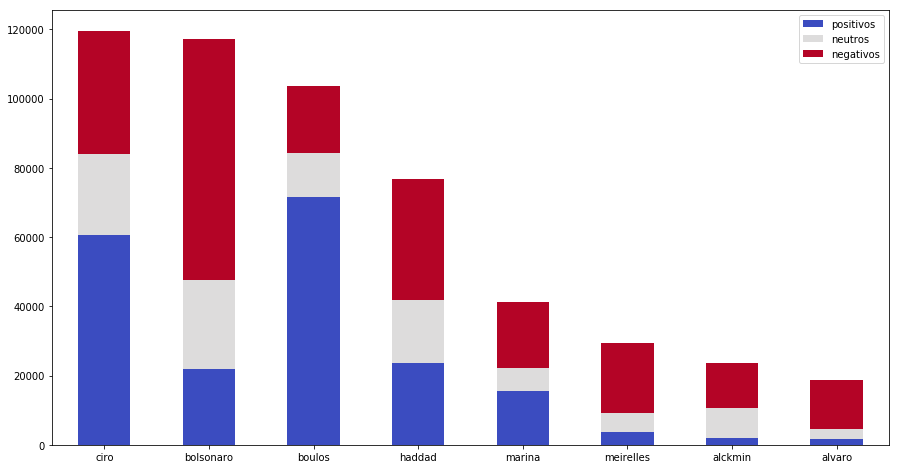

In [79]:
qtde_tweets_df.drop('total', axis=1).plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(15,8), rot=0);